<h6><a href=\"javascript:toggle()\" target=\"_self\">Toggle source code</a></h6>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [2]:
import pandas as pd
import numpy as np

In [3]:
a = pd.read_table('../emap.matrix.txt')
a.set_index(['Gene'], inplace=True)

# Remove those strains that are always nan
remove = {i for i in a.index if list(np.isnan(a.ix[i])).count(True) == len(a.columns)}
a = a.drop(remove)
# Same for conditions
remove = {i for i in a.T.index if list(np.isnan(a.T.ix[i])).count(True) == len(a.T.columns)}
a = a.drop(remove)

In [4]:
# Zero the missing values (maybe better to impute them?)
a[np.isnan(a)] = 0

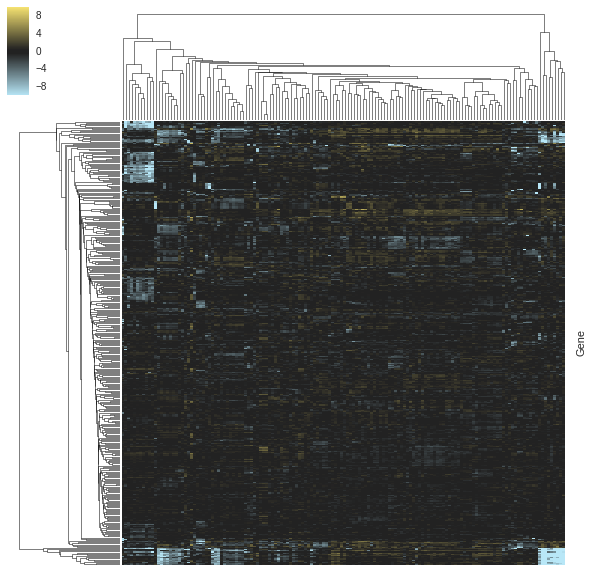

In [5]:
plt.figure(figsize=(15, 15))

cmap = sns.diverging_palette(217, 76, l=89, n=100, center="dark", as_cmap=True)
cmap.set_bad('r', alpha=0.77)

#cmap = plt.get_cmap('RdBu')
#cmap.set_bad('#999999')

aclust = sns.clustermap(a, xticklabels=False,
                       yticklabels=False,
                       linewidths=0,
                       cmap=cmap,
                       #robust=True)
                       vmax=10, vmin=-10,
                       mask=np.isnan(a.as_matrix()))
pass

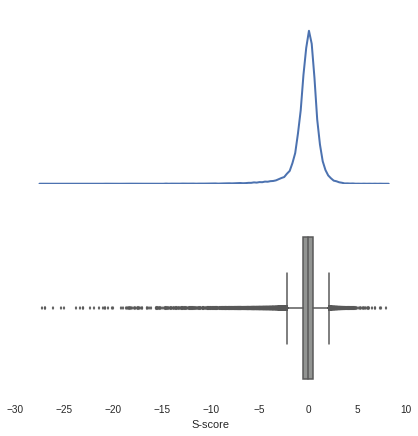

In [6]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
#sns.kdeplot(e.as_matrix().flatten(), lw=2, label='E. coli Keio')
sns.kdeplot(a.as_matrix().flatten(), lw=2)
plt.yticks([])
plt.xticks([])

plt.subplot(2, 1, 2)
sns.boxplot([a.as_matrix().flatten()],
            color=sns.xkcd_rgb["grey"],
            vert=0)
plt.yticks([])
plt.xlabel('S-score')

#plt.suptitle('Overall distributions', fontsize=16)
sns.despine(left=True, bottom=True)

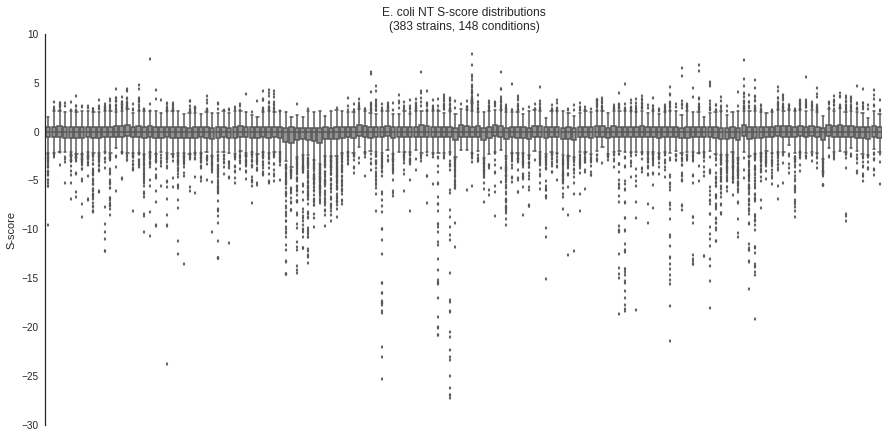

In [7]:
plt.figure(figsize=(15, 7))

sns.boxplot([a[i].as_matrix() for i in a][::-1],
                color=sns.xkcd_rgb["grey"],
                )
                #vert=0,
                #names=[i for i in p][::-1])

plt.title('E. coli NT S-score distributions\n(%d strains, %d conditions)'%(a.shape[0], a.shape[1]))
plt.ylabel('S-score')
#plt.ylim(-30, 30)
plt.xticks([])
sns.despine(bottom=True)

pass

In [8]:
# Load the FDR corrections to identify proper phenotypes
f = pd.read_table('../emap.fdr.txt')
f.set_index('Gene', inplace=True)

In [9]:
# How many significant phenotypes per strain/condition?
v = f[f < 0.05]

strains = {}
for s in v.index:
    strains[s.split()[0]] = v.loc[s].dropna().shape[0]
conditions = {}
for col in v.columns:
    conditions[col] = v[col].dropna().shape[0]

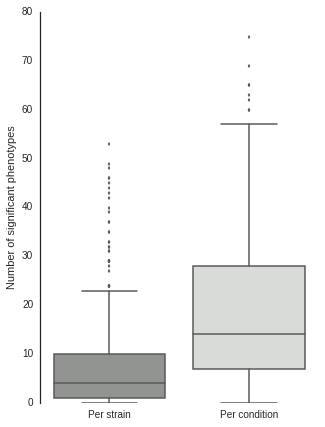

In [10]:
plt.figure(figsize=(5, 7))

sns.boxplot([strains.values(),
             conditions.values()],
           names=['Per strain', 'Per condition'],
           color=(sns.xkcd_rgb["grey"],
                  sns.xkcd_rgb["light grey"]))
plt.ylabel('Number of significant phenotypes')
sns.despine(bottom=True)

In [11]:
v = a[f < 0.05]
prank = {}
for s in v.index:
    prank[s.split()[0]] = sum([x for x in v.loc[s].dropna() if x >= 0])
nrank = {}
for s in v.index:
    nrank[s.split()[0]] = sum([x for x in v.loc[s].dropna() if x <= 0])

In [12]:
def rand_jitter(arr, magnitude=1):
    stdev = arr.max()/100.
    return arr + np.random.randn(len(arr)) * stdev * magnitude

def jitter(x, y=1, s=20, c=None, marker='o',
           cmap=None, norm=None, vmin=None,
           vmax=None, alpha=None, linewidths=None,
           verts=None, hold=None, **kwargs):
    yjit = np.array([y for k in x])
    return plt.scatter(x, rand_jitter(yjit, 3),
                       s=20, c=c, marker=marker,
                       cmap=cmap, norm=norm, vmin=vmin,
                       vmax=vmax, alpha=alpha,
                       linewidths=linewidths, verts=verts,
                       hold=hold, **kwargs)

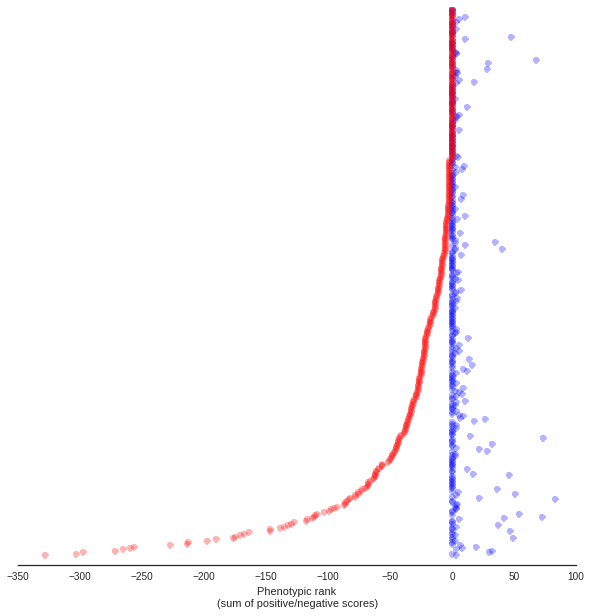

In [13]:
plt.figure(figsize=(10, 10))

# jitter(np.array(prank.values()),
#         c='b',
#         marker='o',
#         alpha=0.3)
# jitter(np.array(nrank.values()),
#         c='r',
#         marker='o',
#         alpha=0.3)
plt.plot([prank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(prank))],
          'bo',
          alpha=0.3)
plt.plot([nrank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(nrank))],
          'ro',
          alpha=0.3)

plt.ylim(-7,len(prank))
plt.yticks([])
plt.xlabel('Phenotypic rank\n(sum of positive/negative scores)')
sns.despine(left=True)

In [14]:
v = a[f < 0.05]
prank = {}
for s in v.index:
    prank[s.split()[0]] = np.array([x for x in v.loc[s].dropna() if x >= 0]).mean()
    if np.isnan(prank[s.split()[0]]):
        prank[s.split()[0]] = 0
nrank = {}
for s in v.index:
    nrank[s.split()[0]] = np.array([x for x in v.loc[s].dropna() if x <= 0]).mean()
    if np.isnan(nrank[s.split()[0]]):
        nrank[s.split()[0]] = 0

/homes/marco/nfs/marco/software/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


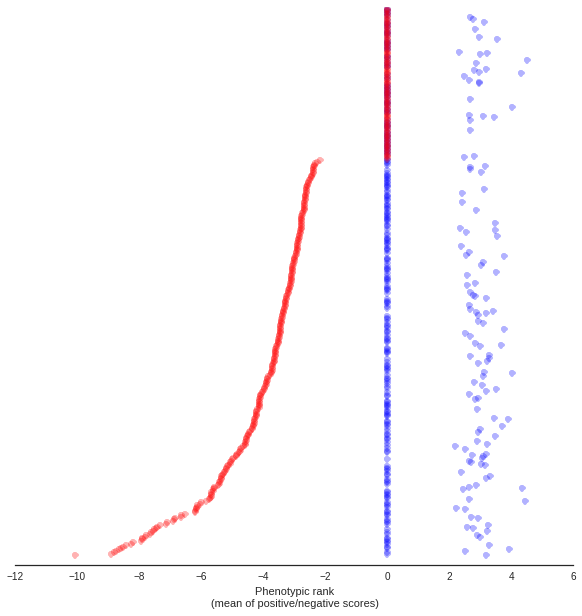

In [15]:
plt.figure(figsize=(10, 10))

# jitter(np.array(prank.values()),
#         c='b',
#         marker='o',
#         alpha=0.3)
# jitter(np.array(nrank.values()),
#         c='r',
#         marker='o',
#         alpha=0.3)
plt.plot([prank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(prank))],
          'bo',
          alpha=0.3)
plt.plot([nrank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(nrank))],
          'ro',
          alpha=0.3)

plt.ylim(-7,len(prank))
plt.yticks([])
plt.xlabel('Phenotypic rank\n(mean of positive/negative scores)')
sns.despine(left=True)

In [16]:
v = a[f < 0.05]
prank = {}
for s in v.index:
    prank[s.split()[0]] = np.median([x for x in v.loc[s].dropna() if x >= 0])
    if np.isnan(prank[s.split()[0]]):
        prank[s.split()[0]] = 0
nrank = {}
for s in v.index:
    nrank[s.split()[0]] = np.median([x for x in v.loc[s].dropna() if x <= 0])
    if np.isnan(nrank[s.split()[0]]):
        nrank[s.split()[0]] = 0

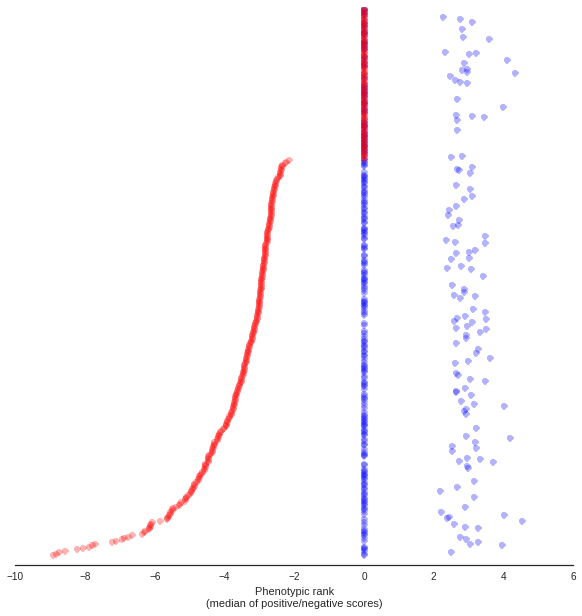

In [17]:
plt.figure(figsize=(10, 10))

# jitter(np.array(prank.values()),
#         c='b',
#         marker='o',
#         alpha=0.3)
# jitter(np.array(nrank.values()),
#         c='r',
#         marker='o',
#         alpha=0.3)
plt.plot([prank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(prank))],
          'bo',
          alpha=0.3)
plt.plot([nrank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(nrank))],
          'ro',
          alpha=0.3)

plt.ylim(-7,len(prank))
plt.yticks([])
plt.xlabel('Phenotypic rank\n(median of positive/negative scores)')
sns.despine(left=True)

In [18]:
v = a[f < 0.05]
prank = {}
for s in v.index:
    prank[s.split()[0]] = sum([1 for x in v.loc[s].dropna() if x >= 0])
nrank = {}
for s in v.index:
    nrank[s.split()[0]] = sum([-1 for x in v.loc[s].dropna() if x <= 0])

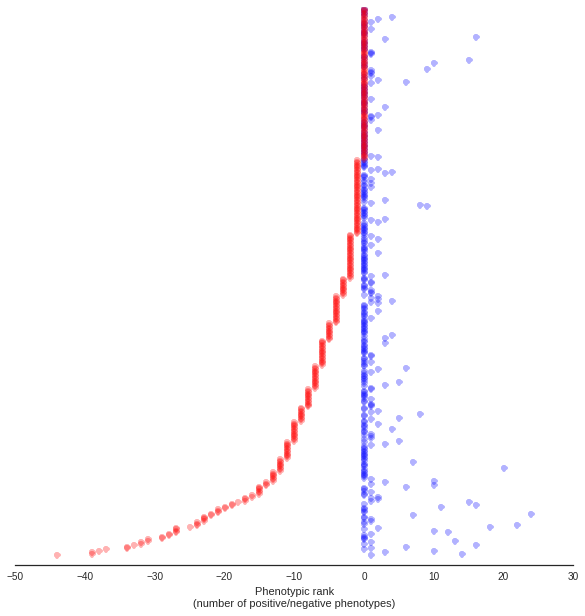

In [19]:
plt.figure(figsize=(10, 10))

# jitter(np.array(prank.values()),
#         c='b',
#         marker='o',
#         alpha=0.3)
# jitter(np.array(nrank.values()),
#         c='r',
#         marker='o',
#         alpha=0.3)
plt.plot([prank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(prank))],
          'bo',
          alpha=0.3)
plt.plot([nrank[k] for k in sorted(nrank, key=lambda x: nrank[x])],
         [x for x in range(len(nrank))],
          'ro',
          alpha=0.3)

plt.ylim(-7,len(prank))
plt.yticks([])
plt.xlabel('Phenotypic rank\n(number of positive/negative phenotypes)')
sns.despine(left=True)

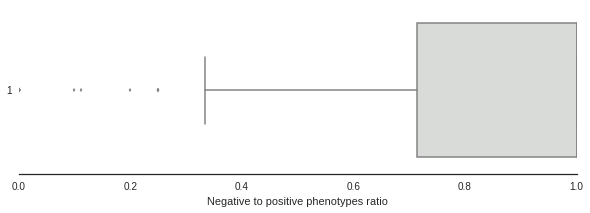

In [20]:
plt.figure(figsize=(10, 3))

sns.boxplot([abs(nrank[k])/float(prank[k]+abs(nrank[k])) for k in nrank if abs(nrank[k])+prank[k] > 0],
           vert=False,
           color=[sns.xkcd_rgb["light grey"]])

plt.xlabel('Negative to positive phenotypes ratio')
sns.despine(left=True)

In [21]:
for k in sorted(nrank, key=lambda x: nrank[x])[:10]:
    print('%s, %d, %d'%(k, nrank[k], prank[k]))

NT12113, -44, 1
NT12224, -39, 14
NT12143, -39, 3
NT12176, -38, 10
NT12132, -37, 0
NT12136, -34, 1
NT12148, -34, 6
NT12062, -33, 16
NT12105, -32, 0
NT12173, -32, 1
